In [140]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings
import pprint
import seaborn as sn
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [184]:
def drop_unwanted_columns(df):
    df = df.drop('team_id', axis=1)
    df = df.drop('game_time', axis=1)
    df = df.drop('game_id', axis=1)
    # df = df.drop('end_golddiff', axis=1)
    # df = df.drop('end_turretdiff', axis=1)
    # df = df.drop('end_leveldiff', axis=1)
    # df = df.drop('end_barondiff', axis=1)
    # df = df.drop('end_dragondiff', axis=1)
    # df = df.drop('end_killdiff', axis=1)
    # df = df.drop('end_deathdiff', axis=1)

    return df

In [185]:

with open('esports-data/lck_2023_diff_stats.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)
df = drop_unwanted_columns(df)


df

,end_golddiff,end_killdiff,end_deathdiff,end_turretdiff,end_leveldiff,end_dragondiff,end_barondiff,mid_golddiff,mid_killdiff,mid_deathdiff,mid_turretdiff,mid_leveldiff,mid_dragondiff,mid_barondiff,won,first_blood,first_turret
0,7698,9,-9,7698,1,3,0,3683,4,-4,3683,0,1,0,True,True,True
1,-7698,-9,9,-7698,-1,-3,0,-3683,-4,4,-3683,0,-1,0,False,False,False
2,1938,-1,1,1938,3,-1,1,-469,0,0,-469,-1,-2,0,True,False,False
3,-1938,1,-1,-1938,-3,1,-1,469,0,0,469,1,2,0,False,True,True
4,-7795,-8,8,-7795,-4,-3,-1,-1572,-1,1,-1572,0,-1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,-8038,-5,5,-8038,-5,-2,0,-3783,-3,3,-3783,-2,1,0,False,False,False
466,-4701,-8,8,-4701,-3,-1,-1,-396,-3,3,-396,0,-1,0,False,True,False
467,4701,8,-8,4701,3,1,1,396,3,-3,396,0,1,0,True,False,True
468,-3497,-4,4,-3497,-1,-3,-1,442,-2,2,442,0,-1,0,False,True,False


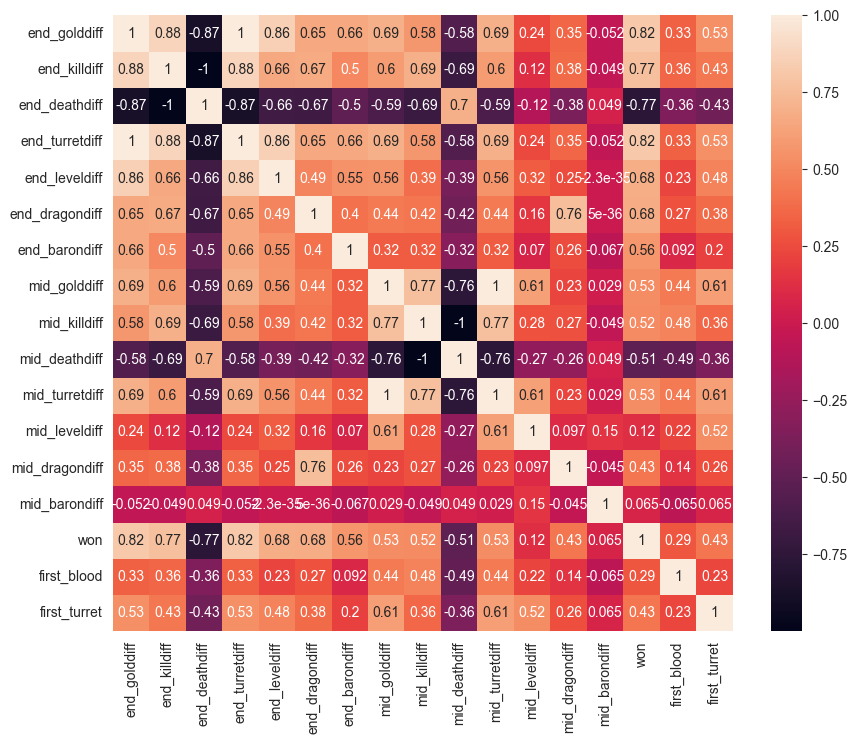

In [197]:
plt.figure(figsize=(10, 8))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [187]:
from sklearn.preprocessing import OrdinalEncoder

# Extract feature and target arrays
X, y = df.drop('won', axis=1), df[['won']]
# y = OrdinalEncoder().fit_transform(y)

In [188]:
y

,won
0,True
1,False
2,True
3,False
4,False
...,...
465,False
466,False
467,True
468,False


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [190]:
# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train)
dtest_clf = xgb.DMatrix(X_test, y_test)

In [191]:
evals = [(dtrain_clf, "train"), (dtest_clf, "validation")]


xgb_classifier = xgb.XGBClassifier(n_estimators=500, objective='binary:logistic', tree_method='hist', eta=0.07, max_depth=3, evals=evals)
xgb_classifier.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=True, early_stopping_rounds=50)

model = xgb_classifier.get_booster()


[0]	validation_0-logloss:0.63855	validation_1-logloss:0.64555
[1]	validation_0-logloss:0.59202	validation_1-logloss:0.60375
[2]	validation_0-logloss:0.54980	validation_1-logloss:0.56758
[3]	validation_0-logloss:0.51332	validation_1-logloss:0.53545
[4]	validation_0-logloss:0.47995	validation_1-logloss:0.50579
[5]	validation_0-logloss:0.45069	validation_1-logloss:0.48037
[6]	validation_0-logloss:0.42356	validation_1-logloss:0.45660
[7]	validation_0-logloss:0.39969	validation_1-logloss:0.43648
[8]	validation_0-logloss:0.37712	validation_1-logloss:0.41775
[9]	validation_0-logloss:0.35695	validation_1-logloss:0.39977
[10]	validation_0-logloss:0.33826	validation_1-logloss:0.38469
[11]	validation_0-logloss:0.32126	validation_1-logloss:0.37100
[12]	validation_0-logloss:0.30616	validation_1-logloss:0.35880
[13]	validation_0-logloss:0.29200	validation_1-logloss:0.34665
[14]	validation_0-logloss:0.27880	validation_1-logloss:0.33667
[15]	validation_0-logloss:0.26558	validation_1-logloss:0.32632
[1

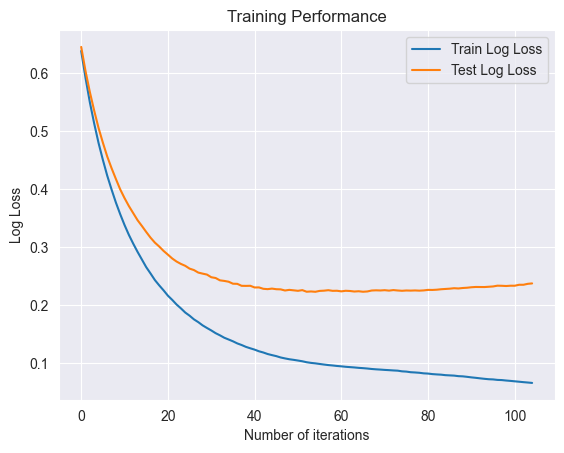

In [192]:
import matplotlib.pyplot as plt

results = xgb_classifier.evals_result()

train_error = results['validation_0']['logloss']
test_error = results['validation_1']['logloss']


x = range(len(test_error))
plt.plot(x, train_error, label='Train Log Loss')
plt.plot(x, test_error, label='Test Log Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Log Loss')
plt.title('Training Performance')
plt.legend()
plt.show()

In [159]:
# from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_clf)

In [147]:
rmse = mean_squared_error(y_test, preds, squared=False)

In [148]:
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.196


In [149]:
# with open('esports-data/lck_2023_team_average_stats.json', 'r') as json_file:
#     testing_data = json.load(json_file)
#
# with open('esports-data/teams_but_better.json', 'r') as json_file:
#     team_names = json.load(json_file)
#
#
# result_dict = dict()
#
# for team_name, team_stats in testing_data.items():
#     count = 0
#     prediction = 0
#     for entry in team_stats:
#         test = pd.DataFrame([entry])
#         test = drop_unwanted_columns(test)
#         test = test.drop('won', axis = 1)
#         test_matrix = xgb.DMatrix(test)
#         prediction += model.predict(test_matrix)
#         count += 1
#     prediction /= count
#     result_dict[team_names[team_name]] = prediction
#

with open('esports-data/lck_2023_diff_stats.json', 'r') as json_file:
    testing_data = json.load(json_file)

with open('esports-data/teams_but_better.json', 'r') as json_file:
    team_names = json.load(json_file)


result_dict = dict()

for stats in testing_data:
    test = pd.DataFrame([stats])
    test = drop_unwanted_columns(test)
    test = test.drop('won', axis = 1)
    test_matrix = xgb.DMatrix(test)
    prediction = model.predict(test_matrix)
    result_dict[stats["game_id"]] = prediction


In [136]:
pprint.pprint(sorted(result_dict.items(), key=lambda x:x[1], reverse=True))


[('ESPORTSTMNT01:3385176', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT01:3415307', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT01:3417138', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT02:3216293', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT02:3219287', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT02:3221863', array([0.9974739], dtype=float32)),
 ('ESPORTSTMNT02:3217854', array([0.9973959], dtype=float32)),
 ('ESPORTSTMNT02:3220426', array([0.9973959], dtype=float32)),
 ('ESPORTSTMNT01:3384734', array([0.99718297], dtype=float32)),
 ('ESPORTSTMNT01:3410111', array([0.99718297], dtype=float32)),
 ('ESPORTSTMNT01:3372716', array([0.99696606], dtype=float32)),
 ('ESPORTSTMNT01:3373049', array([0.99696606], dtype=float32)),
 ('ESPORTSTMNT01:3373110', array([0.99696606], dtype=float32)),
 ('ESPORTSTMNT02:3216786', array([0.99696606], dtype=float32)),
 ('ESPORTSTMNT02:3219293', array([0.99696606], dtype=float32)),
 ('ESPORTSTMNT02:3219312', array([0.99696606], d